In [1]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
polls_data = pd.read_csv("/Users/marinaduarte/Documents/Project-1-Polling-Election-Data/president_polls.csv")
polls_data.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,135712,72333,2020,Michigan,383,Public Policy Polling,338,Progress Michigan,Public Policy Polling,263.0,...,10/30/20 15:02,NaN,https://progressmichigan.org/wp-content/upload...,general,6233,Biden,13256,Joseph R. Biden Jr.,DEM,54.0
1,135712,72333,2020,Michigan,383,Public Policy Polling,338,Progress Michigan,Public Policy Polling,263.0,...,10/30/20 15:02,NaN,https://progressmichigan.org/wp-content/upload...,general,6233,Trump,13254,Donald Trump,REP,44.0
2,135712,72333,2020,Michigan,383,Public Policy Polling,338,Progress Michigan,Public Policy Polling,263.0,...,10/30/20 15:02,NaN,https://progressmichigan.org/wp-content/upload...,general,6233,Jorgensen,14611,Jo Jorgensen,LIB,1.0
3,135712,72333,2020,Michigan,383,Public Policy Polling,338,Progress Michigan,Public Policy Polling,263.0,...,10/30/20 15:02,NaN,https://progressmichigan.org/wp-content/upload...,general,6233,Hawkins,14612,Howie Hawkins,GRE,0.0
4,135691,72326,2020,North Carolina,399,Rasmussen Reports/Pulse Opinion Research,NaN,NaN,Rasmussen Reports/Pulse Opinion Research,277.0,...,10/30/20 12:04,NaN,https://www.rasmussenreports.com/public_conten...,general,6238,Biden,13256,Joseph R. Biden Jr.,DEM,47.0


In [3]:
from datetime import datetime
polls_data['date'] = [datetime.strptime(d, '%m/%d/%y') for d in polls_data['end_date']]
polls_clean1 = polls_data.loc[(polls_data['candidate_name']=='Joseph R. Biden Jr.')&(polls_data['date']>='2020-01-01')|(polls_data['candidate_name']=='Donald Trump')&(polls_data['date']>='2020-01-01')]

ohio1 = polls_clean1.loc[(polls_clean1['state']=='Ohio')]
#|(polls_clean1['state']=='Florida')|(polls_clean1['state']=='Pennsylvania')|(polls_clean1['state']=='Arkansas')|(polls_clean1['state']=='Missouri')|(polls_clean1['state']=='Kentucky')|(polls_clean1['state']=='Nevada')|(polls_clean1['state']=='Louisiana')|(polls_clean1['state']=='Tennessee')]

ohio = ohio1.groupby(['state','date','candidate_name'])['pct'].mean()
ohioDF = pd.DataFrame(ohio)
ohioDF
#Ohio has 18 electoral votes and the last 11 elections the candidate that had more votes in the state 
#was the winner of the election

pct
state date       candidate_name                
Ohio  2020-03-13 Donald Trump         45.500000
                 Joseph R. Biden Jr.  49.000000
      2020-03-25 Donald Trump         47.000000
                 Joseph R. Biden Jr.  42.900000
      2020-04-25 Donald Trump         44.200000
...                                         ...
      2020-10-26 Joseph R. Biden Jr.  43.600000
      2020-10-27 Donald Trump         48.000000
                 Joseph R. Biden Jr.  47.666667
      2020-10-28 Donald Trump         50.000000
                 Joseph R. Biden Jr.  47.333333

[106 rows x 1 columns]

Text(0.5, 1.0, 'Ohio Polls')

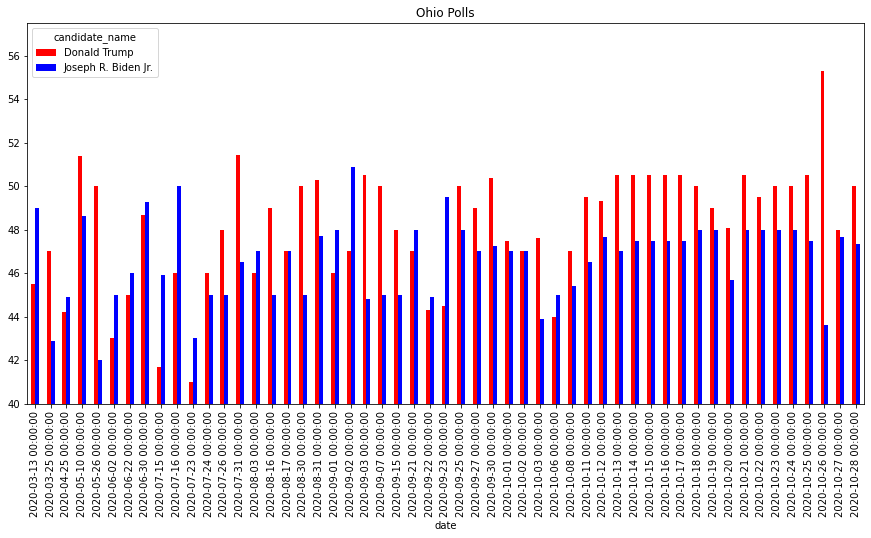

In [23]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
ohio1.groupby(['date','candidate_name']).mean()['pct'].unstack().plot(ax=ax, kind = 'bar', color = ['red', 'blue'])
ax.set_ylim([40,57.5])
plt.title('Ohio Polls')

In [17]:
polls_clean2 = polls_clean1.loc[(polls_clean1['fte_grade'] == 'A-')| (polls_clean1['fte_grade'] == 'A/B')| (polls_clean1['fte_grade'] == 'A+')| (polls_clean1['fte_grade'] == 'A')| (polls_clean1['fte_grade'] == 'B+')| (polls_clean1['fte_grade'] == 'B')]
ohio3 = polls_clean2.loc[(polls_clean2['state']=='Ohio')]
#|(polls_clean1['state']=='Florida')|(polls_clean1['state']=='Pennsylvania')|(polls_clean1['state']=='Arkansas')|(polls_clean1['state']=='Missouri')|(polls_clean1['state']=='Kentucky')|(polls_clean1['state']=='Nevada')|(polls_clean1['state']=='Louisiana')|(polls_clean1['state']=='Tennessee')]

ohio4 = ohio3.groupby(['state','date','candidate_name'])['pct'].mean()
ohioDF2 = pd.DataFrame(ohio4)
ohioDF2

pct
state date       candidate_name            
Ohio  2020-03-13 Donald Trump         45.50
                 Joseph R. Biden Jr.  49.00
      2020-05-10 Donald Trump         51.37
                 Joseph R. Biden Jr.  48.63
      2020-06-02 Donald Trump         43.00
                 Joseph R. Biden Jr.  45.00
      2020-06-22 Donald Trump         45.00
                 Joseph R. Biden Jr.  46.00
      2020-07-24 Donald Trump         46.00
                 Joseph R. Biden Jr.  45.00
      2020-09-21 Donald Trump         47.00
                 Joseph R. Biden Jr.  48.00
      2020-09-23 Donald Trump         44.50
                 Joseph R. Biden Jr.  49.50
      2020-10-02 Donald Trump         47.00
                 Joseph R. Biden Jr.  47.00
      2020-10-06 Donald Trump         44.00
                 Joseph R. Biden Jr.  45.00
      2020-10-12 Donald Trump         47.00
                 Joseph R. Biden Jr.  48.00
      2020-10-20 Donald Trump         47.00
                 Joseph R. Biden Jr.  44.50
      2020-10-27 Donald Trump         43.00
                 Joseph R. Biden Jr.  48.00

Text(0.5, 1.0, 'Ohio Polls (Pollsters graded B and above)')

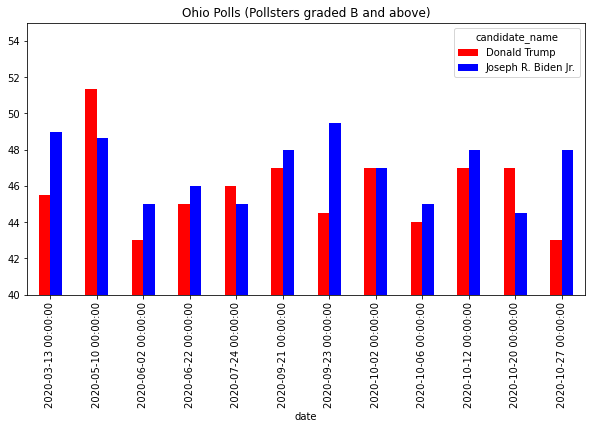

In [24]:
# plot data
fig, ax = plt.subplots(figsize=(10,5))
# use unstack()
ohio3.groupby(['date','candidate_name']).mean()['pct'].unstack().plot(ax=ax, kind = 'bar', color = ['red', 'blue'])
ax.set_ylim([40,55])
plt.title('Ohio Polls (Pollsters graded B and above)')

In [14]:
florida1 = polls_clean1.loc[(polls_clean1['state']=='Florida')&(polls_clean1['date']>'2020-07-01')]
#|(polls_clean1['state']=='Florida')|(polls_clean1['state']=='Pennsylvania')|(polls_clean1['state']=='Arkansas')|(polls_clean1['state']=='Missouri')|(polls_clean1['state']=='Kentucky')|(polls_clean1['state']=='Nevada')|(polls_clean1['state']=='Louisiana')|(polls_clean1['state']=='Tennessee')]

florida = florida1.groupby(['state','date','candidate_name'])['pct'].mean()
floridaDF = pd.DataFrame(florida)
floridaDF

pct
state   date       candidate_name                
Florida 2020-07-02 Donald Trump         45.940000
                   Joseph R. Biden Jr.  45.900000
        2020-07-10 Donald Trump         42.000000
                   Joseph R. Biden Jr.  48.000000
        2020-07-12 Donald Trump         43.000000
...                                           ...
        2020-10-27 Joseph R. Biden Jr.  48.714286
        2020-10-28 Donald Trump         46.800000
                   Joseph R. Biden Jr.  49.600000
        2020-10-29 Donald Trump         46.000000
                   Joseph R. Biden Jr.  51.000000

[128 rows x 1 columns]

Text(0.5, 1.0, 'Florida Polls')

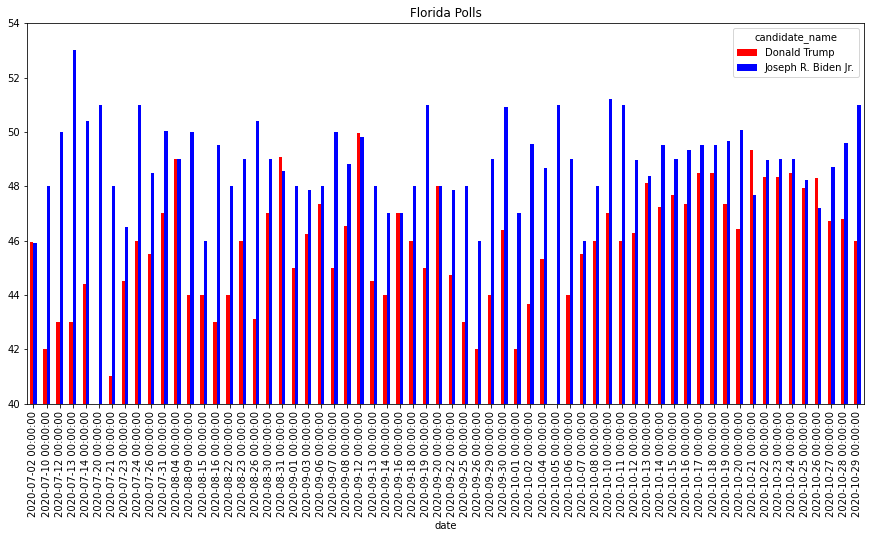

In [25]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
florida1.groupby(['date','candidate_name']).mean()['pct'].unstack().plot(ax=ax, kind = 'bar', color = ['red', 'blue'])
ax.set_ylim([40,54])
plt.title('Florida Polls')

In [19]:
florida3 = polls_clean2.loc[(polls_clean2['state']=='Florida')&(polls_clean2['date']>'2020-07-01')]

florida4 = florida3.groupby(['state','date','candidate_name'])['pct'].mean()
floridaDF2 = pd.DataFrame(florida4)
floridaDF2

pct
state   date       candidate_name                
Florida 2020-07-10 Donald Trump         42.000000
                   Joseph R. Biden Jr.  48.000000
        2020-07-20 Donald Trump         38.000000
                   Joseph R. Biden Jr.  51.000000
        2020-07-23 Donald Trump         46.000000
                   Joseph R. Biden Jr.  50.000000
        2020-08-22 Donald Trump         44.000000
                   Joseph R. Biden Jr.  48.000000
        2020-09-01 Donald Trump         45.000000
                   Joseph R. Biden Jr.  48.000000
        2020-09-03 Donald Trump         46.000000
                   Joseph R. Biden Jr.  51.000000
        2020-09-06 Donald Trump         48.000000
                   Joseph R. Biden Jr.  47.500000
        2020-09-13 Donald Trump         45.333333
                   Joseph R. Biden Jr.  49.666667
        2020-09-18 Donald Trump         46.000000
                   Joseph R. Biden Jr.  48.000000
        2020-09-20 Donald Trump         49.000000
                   Joseph R. Biden Jr.  47.500000
        2020-10-01 Donald Trump         42.000000
                   Joseph R. Biden Jr.  47.000000
        2020-10-04 Donald Trump         45.000000
                   Joseph R. Biden Jr.  48.000000
        2020-10-05 Donald Trump         40.000000
                   Joseph R. Biden Jr.  51.000000
        2020-10-12 Donald Trump         46.700000
                   Joseph R. Biden Jr.  49.300000
        2020-10-16 Donald Trump         47.000000
                   Joseph R. Biden Jr.  48.000000
        2020-10-23 Donald Trump         48.000000
                   Joseph R. Biden Jr.  50.000000
        2020-10-26 Donald Trump         46.000000
                   Joseph R. Biden Jr.  48.000000
        2020-10-27 Donald Trump         45.000000
                   Joseph R. Biden Jr.  49.000000
        2020-10-28 Donald Trump         45.333333
                   Joseph R. Biden Jr.  50.333333
        2020-10-29 Donald Trump         45.000000
                   Joseph R. Biden Jr.  52.000000

Text(0.5, 1.0, 'Florida Polls (Pollsters graded B and above)')

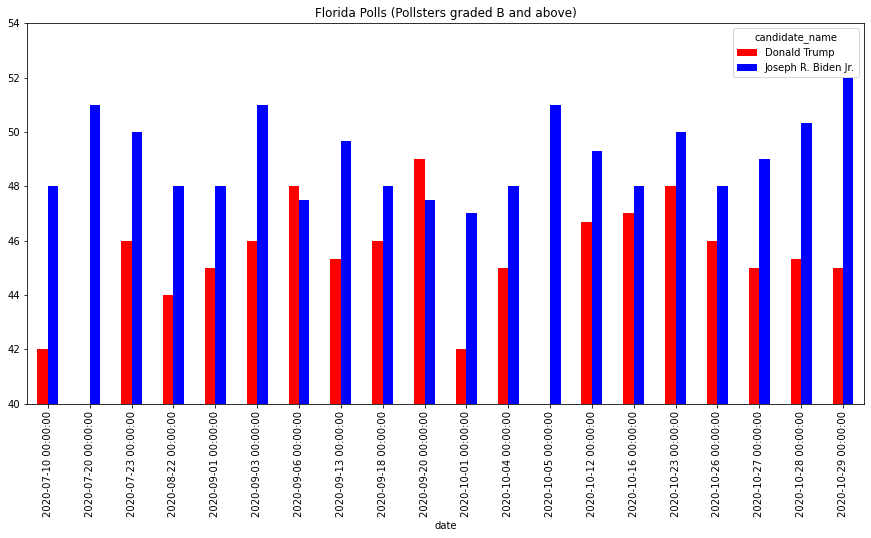

In [26]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
florida3.groupby(['date','candidate_name']).mean()['pct'].unstack().plot(ax=ax, kind= 'bar', color = ['red', 'blue'])
ax.set_ylim([40,54])
plt.title('Florida Polls (Pollsters graded B and above)')

In [30]:
pennsylvania1 = polls_clean1.loc[(polls_clean1['state']=='Pennsylvania')&(polls_clean1['date']>'2020-07-01')]

pennsylvania = pennsylvania1.groupby(['state','date','candidate_name'])['pct'].mean()
pennsylvaniaDF = pd.DataFrame(pennsylvania)
pennsylvaniaDF

pct
state        date       candidate_name            
Pennsylvania 2020-07-02 Donald Trump         42.70
                        Joseph R. Biden Jr.  48.00
             2020-07-12 Donald Trump         42.00
                        Joseph R. Biden Jr.  50.00
             2020-07-13 Donald Trump         42.00
...                                            ...
             2020-10-27 Joseph R. Biden Jr.  51.75
             2020-10-28 Donald Trump         45.50
                        Joseph R. Biden Jr.  52.50
             2020-10-29 Donald Trump         45.50
                        Joseph R. Biden Jr.  51.50

[138 rows x 1 columns]

Text(0.5, 1.0, 'Pennsylvania Polls')

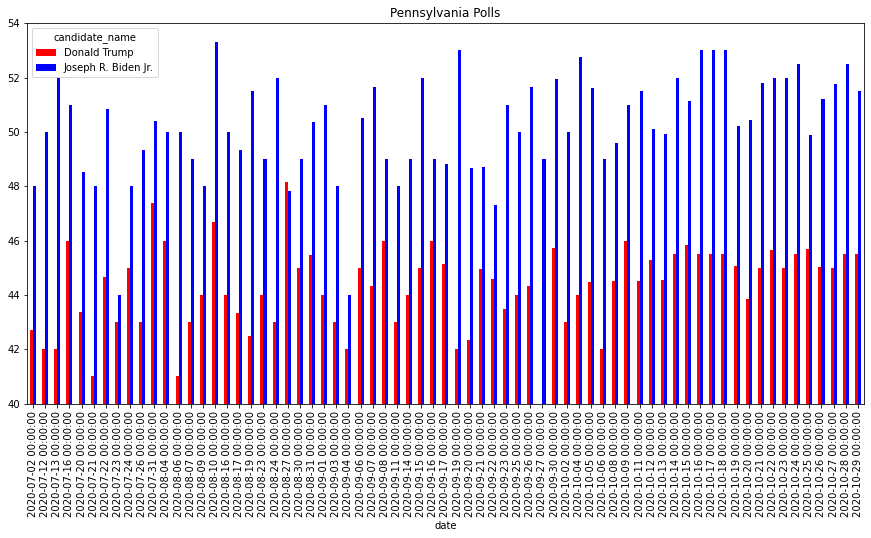

In [31]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
pennsylvania1.groupby(['date','candidate_name']).mean()['pct'].unstack().plot(ax=ax, kind = 'bar', color = ['red', 'blue'])
ax.set_ylim([40,54])
plt.title('Pennsylvania Polls')

In [34]:
pennsylvania3 = polls_clean2.loc[(polls_clean2['state']=='Pennsylvania')&(polls_clean2['date']>'2020-07-01')]

pennsylvania4 = pennsylvania3.groupby(['state','date','candidate_name'])['pct'].mean()
pennsylvaniaDF2 = pd.DataFrame(pennsylvania3)
pennsylvaniaDF2

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct,date
8,135693,72328,2020,Pennsylvania,383,Public Policy Polling,1405,Climate Power 2020,Public Policy Polling,263.0,...,NaN,https://www.climatepower2020.org/wp-content/up...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,52.0,2020-10-29
9,135693,72328,2020,Pennsylvania,383,Public Policy Polling,1405,Climate Power 2020,Public Policy Polling,263.0,...,NaN,https://www.climatepower2020.org/wp-content/up...,general,6249,Trump,13254,Donald Trump,REP,45.0,2020-10-29
406,135487,72222,2020,Pennsylvania,396,Quinnipiac University,NaN,NaN,Quinnipiac University,267.0,...,NaN,https://poll.qu.edu/florida/release-detail?Rel...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,51.0,2020-10-27
407,135487,72222,2020,Pennsylvania,396,Quinnipiac University,NaN,NaN,Quinnipiac University,267.0,...,NaN,https://poll.qu.edu/florida/release-detail?Rel...,general,6249,Trump,13254,Donald Trump,REP,44.0,2020-10-27
1598,134285,71678,2020,Pennsylvania,383,Public Policy Polling,1484,American Bridge 21st Century,Public Policy Polling,263.0,...,NaN,https://americanbridgepac.org/wp-content/uploa...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,51.0,2020-10-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8998,125388,67101,2020,Pennsylvania,320,Monmouth University,NaN,NaN,Monmouth University,215.0,...,NaN,https://www.monmouth.edu/polling-institute/doc...,general,6249,Trump,13254,Donald Trump,REP,40.0,2020-07-13
8999,125391,67101,2020,Pennsylvania,320,Monmouth University,NaN,NaN,Monmouth University,215.0,...,higher likely turnout,https://www.monmouth.edu/polling-institute/doc...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,52.0,2020-07-13
9000,125391,67101,2020,Pennsylvania,320,Monmouth University,NaN,NaN,Monmouth University,215.0,...,higher likely turnout,https://www.monmouth.edu/polling-institute/doc...,general,6249,Trump,13254,Donald Trump,REP,42.0,2020-07-13
9001,125392,67101,2020,Pennsylvania,320,Monmouth University,NaN,NaN,Monmouth University,215.0,...,lower likely turnout,https://www.monmouth.edu/polling-institute/doc...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,51.0,2020-07-13


Text(0.5, 1.0, 'Pennsylvania Polls (Pollsters graded B and above)')

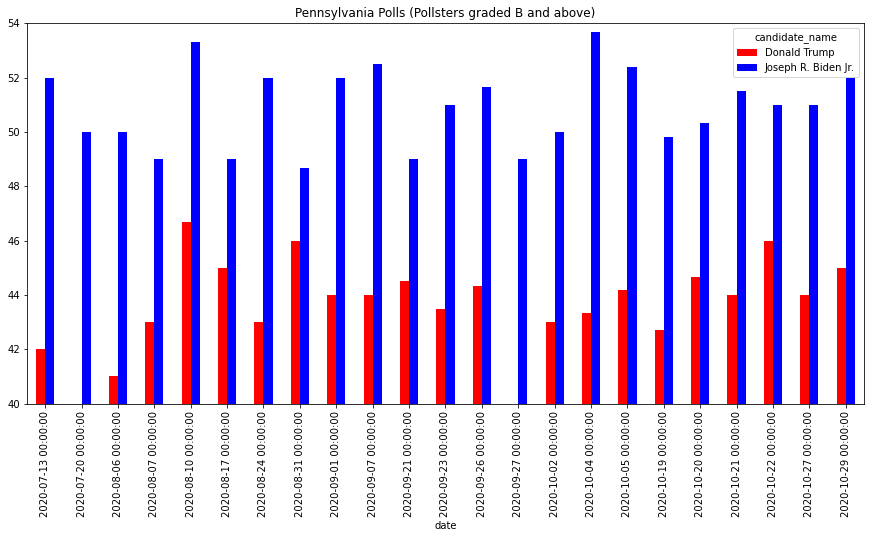

In [35]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
pennsylvania3.groupby(['date','candidate_name']).mean()['pct'].unstack().plot(ax=ax, kind= 'bar', color = ['red', 'blue'])
ax.set_ylim([40,54])
plt.title('Pennsylvania Polls (Pollsters graded B and above)')

In [36]:
nevada1 = polls_clean1.loc[(polls_clean1['state']=='Nevada')&(polls_clean1['date']>'2020-07-01')]

nevada = nevada1.groupby(['state','date','candidate_name'])['pct'].mean()
nevadaDF = pd.DataFrame(nevada)
nevadaDF

pct
state  date       candidate_name                
Nevada 2020-07-31 Donald Trump         51.310000
                  Joseph R. Biden Jr.  46.835000
       2020-08-30 Donald Trump         38.600000
                  Joseph R. Biden Jr.  44.000000
       2020-08-31 Donald Trump         47.680000
                  Joseph R. Biden Jr.  50.920000
       2020-09-10 Donald Trump         42.000000
                  Joseph R. Biden Jr.  46.000000
       2020-09-21 Donald Trump         43.000000
                  Joseph R. Biden Jr.  47.000000
       2020-09-23 Donald Trump         40.500000
                  Joseph R. Biden Jr.  51.000000
       2020-09-25 Donald Trump         44.500000
                  Joseph R. Biden Jr.  47.500000
       2020-09-30 Donald Trump         45.840000
                  Joseph R. Biden Jr.  51.985000
       2020-10-06 Donald Trump         42.000000
                  Joseph R. Biden Jr.  48.000000
       2020-10-09 Donald Trump         46.000000
                  Joseph R. Biden Jr.  52.000000
       2020-10-11 Donald Trump         42.000000
                  Joseph R. Biden Jr.  44.000000
       2020-10-12 Donald Trump         46.000000
                  Joseph R. Biden Jr.  52.000000
       2020-10-13 Donald Trump         46.000000
                  Joseph R. Biden Jr.  52.500000
       2020-10-14 Donald Trump         46.000000
                  Joseph R. Biden Jr.  53.000000
       2020-10-15 Donald Trump         46.000000
                  Joseph R. Biden Jr.  53.000000
       2020-10-16 Donald Trump         47.000000
                  Joseph R. Biden Jr.  52.000000
       2020-10-17 Donald Trump         47.000000
                  Joseph R. Biden Jr.  52.000000
       2020-10-18 Donald Trump         46.000000
                  Joseph R. Biden Jr.  52.500000
       2020-10-19 Donald Trump         47.000000
                  Joseph R. Biden Jr.  52.000000
       2020-10-20 Donald Trump         45.666667
                  Joseph R. Biden Jr.  51.666667
       2020-10-21 Donald Trump         47.000000
                  Joseph R. Biden Jr.  51.500000
       2020-10-22 Donald Trump         47.000000
                  Joseph R. Biden Jr.  51.500000
       2020-10-23 Donald Trump         45.000000
                  Joseph R. Biden Jr.  50.666667
       2020-10-24 Donald Trump         48.000000
                  Joseph R. Biden Jr.  50.500000
       2020-10-25 Donald Trump         47.000000
                  Joseph R. Biden Jr.  51.500000
       2020-10-26 Donald Trump         43.000000
                  Joseph R. Biden Jr.  49.000000
       2020-10-27 Donald Trump         48.000000
                  Joseph R. Biden Jr.  50.500000
       2020-10-28 Donald Trump         46.666667
                  Joseph R. Biden Jr.  50.333333

Text(0.5, 1.0, 'Nevada Polls')

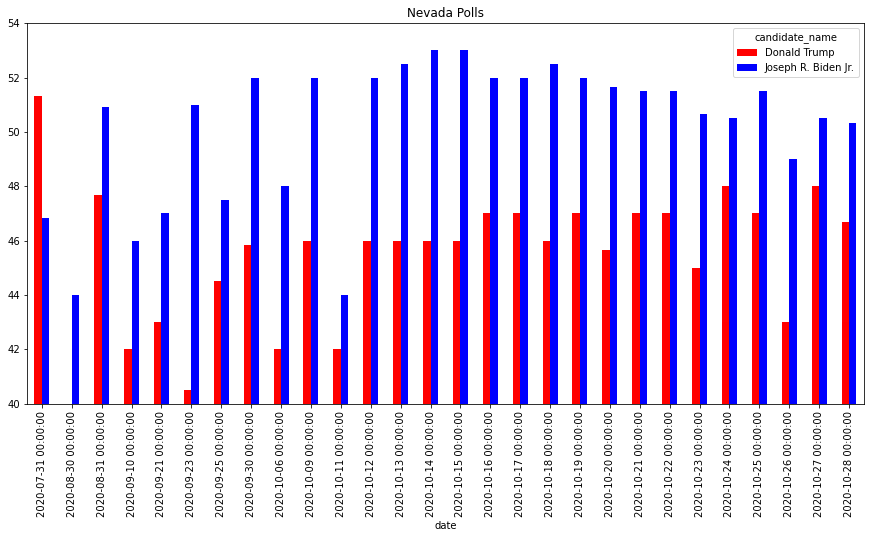

In [37]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
nevada1.groupby(['date','candidate_name']).mean()['pct'].unstack().plot(ax=ax, kind = 'bar', color = ['red', 'blue'])
ax.set_ylim([40,54])
plt.title('Nevada Polls')

In [42]:
nevada3 = polls_clean2.loc[(polls_clean2['state']=='Nevada')]

nevada4 = nevada3.groupby(['state','date','candidate_name'])['pct'].mean()
nevadaDF2 = pd.DataFrame(nevada4)
nevadaDF2

pct
state  date       candidate_name           
Nevada 2020-01-08 Donald Trump         40.5
                  Joseph R. Biden Jr.  47.0
       2020-09-10 Donald Trump         42.0
                  Joseph R. Biden Jr.  46.0
       2020-09-23 Donald Trump         40.5
                  Joseph R. Biden Jr.  51.0
       2020-10-06 Donald Trump         42.0
                  Joseph R. Biden Jr.  48.0
       2020-10-09 Donald Trump         46.0
                  Joseph R. Biden Jr.  52.0
       2020-10-26 Donald Trump         43.0
                  Joseph R. Biden Jr.  49.0

Text(0.5, 1.0, 'Nevada Polls (Pollsters graded B and above)')

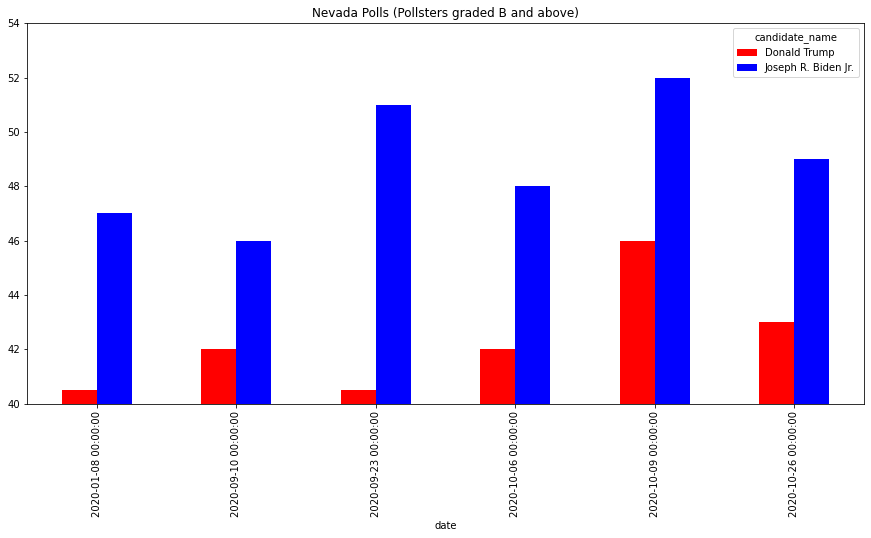

In [43]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
nevada3.groupby(['date','candidate_name']).mean()['pct'].unstack().plot(ax=ax, kind= 'bar', color = ['red', 'blue'])
ax.set_ylim([40,54])
plt.title('Nevada Polls (Pollsters graded B and above)')